<html><head>



Carolyn Massa - April, 2020

Capstone #2 - AirBnb Price Prediction - An exploration into key factors that determine the pricing of an AIRBNB

<ol>
Primary Source of AirBNB Data:
<li> http://insideairbnb.com/get-the-data.html</li>
Supplementary Sources of Data:
<li>2018 top 10 attractions in Paris</li> 
<li>Haversine Formula</li>
</ol>

</script>

</head>

<body>
    <h2>Here's a high-level overview:
</h2>
<ol>
  <li>Data Collection</li>
  <li>Exploratory Data Analysis</li>
  <li>Data Wrangling</li>
  <li>Test and Train using Logistic Regression and LIGHT Model Gradient Boost</li>
   <li>A one tailed T -Test, Chi Squared to test the H0:  "It does not matter if you are close to the Top 10 attractions in Paris as the price is the same" and the HA "Prices are higher the closer you are to the Top 10 Attractions"
       P-Value and T Stat tests</li>
    <li>A word cloud generated from using nltk.WordNetLemmatizer to show the most popular words to use for a listing description</li>
</ol>



<head>



1) I would like to be able to explore and answer the following questions:
•	How does each location influence the property rental price?  
•	Do reviews affect the pricing?  
•	Can a traveler stay close to the main attractions such as the Eiffel Tower and the most popular museums such as the Louvre and Musee D’Orsay?
•	What other features drive the price of an airbnb rental property?
o	i.e. price vs location, price vs distance from a top attraction, price vs. access to transportation and perhaps convention centers as there are many conventions in September

2) Recommend Airbnb properties given a certain criteria, and enable a more informed decision for a traveler:

•	walking distance to one of the top attractions (within 2 miles)
•	walking distance to metro or other mass transit stations (within 1 mile)
•	rating >= 8 miles
•	other user defined criteria i.e. cleanliness, views, etc
•	number of beds
•	number of bedrooms
•	price range
•	type of property

3) How well can we predict a listing's price and what features correlate well with the pricing?

Business Case questions:

Where to invest in a property in Paris to get the maximum number of returns from Airbnb?
How well can we predict reviews and what features correlate well with the reviews?
Which neighborhoods have the largest increase in listings from 2015 to 2019?

In this notebook I plan to just show EDA and results outside Paris and different functions of Calendar DataSet

</body>
</html>



# Below I import my libraries to collect and  explore my data

In [1]:
#Data Collection

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import geopandas
import branca
import folium
import urllib
import os
print(os.getcwd())
import pyximport
pyximport.install()
import squarify
import re
from datetime import date
import datetime
import calendar
import holidays

#Stats Modeling/Comparisons of Means

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import scipy.stats as stats
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from shapely.geometry import Point
import shapely.ops as sp_ops
import pyproj
import functools

import missingno as msno
import pandas_profiling

import ipywidgets as widgets

#Data Modeling/Algorithms

import sklearn
import scipy




#Word Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
import nltk
import string
from wordcloud import WordCloud,ImageColorGenerator



ModuleNotFoundError: No module named 'geopandas'

# Data Collection and Review - First let's read our date in and see what we are working with.
#I import my datasets from insideAirBNB by the years and Months I will Analyze (2015, 2016 & 2019)

In [115]:
#First let's Analyze a typical dataset of the listings by month to review the data points
#I start with 2019 for 5 months from insideairbnb.com

listing_2019_04_OP = pd.read_csv('listings_basics_2019_04.csv', parse_dates=['last_review'])
listing_Details_2019_4_OP = pd.read_csv('listings_details_2019_04.csv')





C:\Users\1800r\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [116]:
listing_2019_04_OP.head(5) #Below in my first list I see 18 variables related to the listing host and id, price and area

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2394,HAUT MARAIS / STUDIO- 840 EUR/MONTH,2626,Franck,NaN,Temple,48.86518,2.35590,Entire home/apt,52,7,71,2015-09-05,0.56,2,315
1,2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86993,2.36251,Entire home/apt,125,3,1,2019-01-02,0.31,1,148
2,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83349,2.31852,Entire home/apt,75,3,8,2018-12-19,0.29,1,277
3,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85100,2.35869,Entire home/apt,115,1,168,2019-03-25,1.41,1,59
4,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85758,2.35275,Entire home/apt,115,10,241,2019-03-22,2.47,2,216


In [117]:
#now let's look at the quantity of our observations starting with 2015 and see how the listings have grown with the popularity of AirBNB

In [118]:
listing_2019_04_OP.shape #Here we see how many Variables and observations we have

(58184, 16)

In [12]:

Geo_NBH_2019 = geopandas.read_file('neighbourhoods_2019_05.geojson',
                                     driver='GeoJSON')

NameError: name 'geopandas' is not defined

In [13]:
Geo_NBH_2019.head(5)

NameError: name 'Geo_NBH_2019' is not defined

In [14]:
Geo_NBH_2019.shape # We see 20 neighborhoods and 3 Variables

NameError: name 'Geo_NBH_2019' is not defined

In [15]:
import json #Here I use GEOJSON to review the features in the neighborhood groups
with open('neighbourhoods_2019_05.geojson') as f:
    data = json.load(f)
for feature in data['features']:
    print(feature['properties'])

{'neighbourhood': 'Batignolles-Monceau', 'neighbourhood_group': None}
{'neighbourhood': 'Palais-Bourbon', 'neighbourhood_group': None}
{'neighbourhood': 'Buttes-Chaumont', 'neighbourhood_group': None}
{'neighbourhood': 'OpÃ©ra', 'neighbourhood_group': None}
{'neighbourhood': 'EntrepÃ´t', 'neighbourhood_group': None}
{'neighbourhood': 'Gobelins', 'neighbourhood_group': None}
{'neighbourhood': 'Vaugirard', 'neighbourhood_group': None}
{'neighbourhood': 'Reuilly', 'neighbourhood_group': None}
{'neighbourhood': 'Louvre', 'neighbourhood_group': None}
{'neighbourhood': 'Luxembourg', 'neighbourhood_group': None}
{'neighbourhood': 'Ã‰lysÃ©e', 'neighbourhood_group': None}
{'neighbourhood': 'Temple', 'neighbourhood_group': None}
{'neighbourhood': 'MÃ©nilmontant', 'neighbourhood_group': None}
{'neighbourhood': 'PanthÃ©on', 'neighbourhood_group': None}
{'neighbourhood': 'Passy', 'neighbourhood_group': None}
{'neighbourhood': 'Observatoire', 'neighbourhood_group': None}
{'neighbourhood': 'Popincour

In [16]:
Calendar_2019_04.head(5) #Here I review the availability of the properties 

NameError: name 'Calendar_2019_04' is not defined

# Below I will work with my Listing Summary data as well as the Full detailed Listings

In [121]:
listing_Details_2019_4_OP.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [122]:
#Here I Extract the columns I think are useful to my analysis and format the datetime 
listing_Details_2019_4_OP= listing_Details_2019_4_OP[['id', 'host_since', 'host_location',
                                                 'zipcode', 'smart_location', 'accommodates', 
                                                 'bathrooms', 'beds', 'bed_type', 'review_scores_rating', 'property_type','cancellation_policy','availability_30', 'availability_60', 'availability_90', 'amenities']]
listing_Details_2019_4_OP.host_since = pd.to_datetime(listing_Details_2019_4_OP.host_since, format='%Y-%m-%d')


# Below I merge my 2 types of listings data together to form one list with the Variables that are valuable to my research

In [123]:
listing_2019_April_OP = pd.merge(listing_2019_04, listing_Details_2019_4, on='id')
""" Here I merge the listing basics with the FULL summary to review each column together in one df"""

listing_2019_April_OP = listing_2019_April_OP[['id',
                                 'host_id',
                                 'host_name',
                                 'host_since',
                                 'host_location',
                                 'neighbourhood',
                                  'beds',
                                 'latitude',
                                 'longitude',
                                 'zipcode',
                                 'smart_location',
                                  'property_type',
                                 'room_type',
                                 'accommodates',
                                 'bed_type',
                                 'review_scores_rating',
                                 'price',
                                  'amenities',
                                 'minimum_nights',
                                 'number_of_reviews',
                                 'reviews_per_month',
                                 'cancellation_policy',
                                 'calculated_host_listings_count',
                                  'availability_30','availability_60','availability_90',
                                 'availability_365']]

NameError: name 'listing_2019_04' is not defined

In [124]:
listing_2019_April_OP.head(5) #Now I have 27 columns of data points in one dataframe. # Notes about each dota column that have ambiguity are below

NameError: name 'listing_2019_April_OP' is not defined

In [37]:
listing_2019_April_OP.shape

NameError: name 'listing_2019_April_OP' is not defined

In [38]:
#Accommodates = # of people the location can capacitate (the range is 1 through 17),

In [39]:
listing_2019_April_OP.describe().T #I see that I have 58184 listings in April of 2019

NameError: name 'listing_2019_April_OP' is not defined

# Data Wrangling : Now Let's Review our Data and check for missing values

In [40]:
listing_2019_April_OP.info()#I review details to verify that I have missing 
#data as reviewScores are not matching with my listing id counts as well as 6 other data point variables


NameError: name 'listing_2019_April_OP' is not defined

In [41]:
listing_2019_April_OP.isnull().sum() #I check to look for the missing values and immediately notice that BEDS contains missing values that could be important

NameError: name 'listing_2019_April_OP' is not defined

In [42]:
listing_2019_April_OP.minimum_nights.max() #I verify that there are many outliers in my data for min nights

NameError: name 'listing_2019_April_OP' is not defined

In [43]:
sns.boxplot(x=listing_2019_April_OP['minimum_nights'], y=listing_2019_April_OP['price'], showmeans=True)
plt.title('minimum nights vs Price',fontsize=20 )
plt.xticks([0,1],['minimum nights', 'Price'])
plt.show()

NameError: name 'listing_2019_April_OP' is not defined

In [44]:
listing_2019_April_OP['minimum_nights'].value_counts()
listing_2019_April_OP['minimum_nights'].describe() #We see we our average is 5.6 so I will impute my minimum_nights column with the average

NameError: name 'listing_2019_April_OP' is not defined

# I notice it is strange to have such a large "Minimum nights" so I create a countplot to check them

In [45]:
g = listing_2019_April_OP.groupby(['minimum_nights', 'room_type']).size().reset_index(name='count') #I need to group the ages then plot them as % against churn like "the highest churn rate was those customers between 35 and 50 with a churn % of 28%, etc"
plt.bar(g['minimum_nights'],g['count'])
plt.xlabel('Minimum Nights required')
plt.ylabel('Type of Property - Room/Apartment/Home')

NameError: name 'listing_2019_April_OP' is not defined

In [46]:
#Below I simple change any values in minimum_nights that are above 15 to 5 which is the average.

In [47]:
listing_2019_April_OP.loc[listing_2019_April_OP['minimum_nights'] > 15,'minimum_nights'] = 5 #Check

NameError: name 'listing_2019_April_OP' is not defined

In [48]:
listing_2019_April_OP['minimum_nights'].describe()

NameError: name 'listing_2019_April_OP' is not defined

In [49]:
#fill missing values for rows with null values in 'beds' which I equate with the 'accommodates' numbers
for i,row in listing_2019_April_OP.loc[listing_2019_April_OP['beds'].isnull(),:].iterrows():
   
    if np.isnan(listing_2019_April_OP.loc[i, 'accommodates']) == False:
        listing_2019_April_OP.loc[i,'beds'] = listing_2019_April_OP.loc[i, 'accommodates']
       # print('set', dfParis.loc[i,'beds'], dfParis.loc[i, 'bedrooms'])
    #elif dfParis.loc[i,'rating_ind'] == 1:
       #we set bed to 1 and set the accomodate to 1 if property is rated
       #we can assume there is one bed for the property if it has been rented out
       #flats or studio type flats we can assume there is a bed, and count it as a bedroom
    else:
        listing_2019_April_OP.loc[i,'beds'] = 1
        listing_2019_April_OP.loc[i, 'accommodates'] =1 

          
     

NameError: name 'listing_2019_April_OP' is not defined

In [50]:
for i,row in listing_2019_April_OP.loc[listing_2019_April_OP['accommodates'].isnull(),:].iterrows(): #Here I match up the beds with the # of guests

    if listing_2019_April_OP.loc[i, 'beds'] > 0 :
        listing_2019_April_OP.loc[i,'accommodates'] = 1
    elif np.isnan(listing_2019_April_OP.loc[i, 'beds']) == True:
       #flats or studio type flats we can assume there is a bed, and count it as a bedroom
        listing_2019_April_OP.loc[i,'beds'] = 1
        listing_2019_April_OP.loc[i, 'accommodates'] =1   

NameError: name 'listing_2019_April_OP' is not defined

In [51]:
listing_2019_April_OP.head(5) #We verify the above "for loops" have run accurately

NameError: name 'listing_2019_April_OP' is not defined

In [52]:
#Here I need to be able to count my ratings for each listing so I replace the NAN with a 0 
def set_rating_ind(row):
    if np.isnan(row['review_scores_rating']) == True:
        return 0
    else:
        return 1

In [53]:
listing_2019_April_OP['rating_ind'] = listing_2019_April_OP.apply(lambda x: set_rating_ind(x), 1) 
#I add a column to track the listings with reviews by applying my set_rating function

NameError: name 'listing_2019_April_OP' is not defined

In [54]:
listing_2019_April_OP.head(5)

NameError: name 'listing_2019_April_OP' is not defined

In [55]:
listing_2019_April_OP.shape 

NameError: name 'listing_2019_April_OP' is not defined

In [56]:
#I need to remove my empty data points by filling them with a 0 and converting both my ID and Host ID to a string for analysis
listing_2019_April_OP.fillna(0, inplace=True)

listing_2019_April_OP['id'] = listing_2019_April_OP['id'].astype(str)
listing_2019_April_OP['host_id'] = listing_2019_April_OP['host_id'].astype(str)

NameError: name 'listing_2019_April_OP' is not defined

## Since the focus here is Paris I want to drop the zip codes that do not correspond to them "officially" being located in Paris which mean the property is between the 75001 and 75021 Zip Codes.

In [57]:
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75011\n75011', 'zipcode'] = 75019
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75003\n75003', 'zipcode'] = 75004
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == 'FR', 'zipcode'] = 92130
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == 'FR75016', 'zipcode'] = 75016
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == 'N', 'zipcode'] = 75018J
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == 'Paris75004', 'zipcode'] = 75002
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75.0', 'zipcode'] = 75012
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '0', 'zipcode'] = 75008
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75018e', 'zipcode'] = 93310
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '*75016', 'zipcode'] = 92130
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '7518', 'zipcode'] = 75018
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == 'Paris 75004', 'zipcode'] = 75011
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '74400.0', 'zipcode'] = 75002
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '-- default zip code --', 'zipcode'] = 75002
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75007.0', 'zipcode'] = 75007
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75011.0', 'zipcode'] = 75011
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75001.0', 'zipcode'] = 75001
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75010.0', 'zipcode'] = 75010
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75012.0', 'zipcode'] = 75012
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75002.0', 'zipcode'] = 75002
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75008.0', 'zipcode'] = 75008
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75005.0', 'zipcode'] = 75005
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75009.0', 'zipcode'] = 75009
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75012.0', 'zipcode'] = 75012
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75016.0', 'zipcode'] = 75016
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75013.0', 'zipcode'] = 75013
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75018e', 'zipcode'] = 75018
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75o16', 'zipcode'] = 75016
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75\xa0011', 'zipcode'] = 75011
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '0', 'zipcode'] = 75001
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '75', 'zipcode'] = 75012
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '700014', 'zipcode'] = 75002
listing_2019_April_OP.loc[listing_2019_April_OP.zipcode == '33780', 'zipcode'] = 75106



NameError: name 'listing_2019_April_OP' is not defined

In [58]:
listing_2019_April_OP.zipcode = listing_2019_April_OP.zipcode.astype(int) #I remove floats from my zipcodes and transform them into integers

NameError: name 'listing_2019_April_OP' is not defined

In [59]:
listing_2019_April_OP.groupby(['zipcode']).max()

NameError: name 'listing_2019_April_OP' is not defined

In [60]:

listing_2019_April_OP['price'].describe().T #here I check for outliers in my pricing data to discover the highest rate is 9379 per night which seems unlikely


NameError: name 'listing_2019_April_OP' is not defined

In [61]:
listing_2019_April_OP[listing_2019_April_OP['price'] == 2500] #Since there seem to be outliers in my pricing data which truly are inaccurate I aim to identify them and remove them as they will skew my pricing and earnings data

NameError: name 'listing_2019_April_OP' is not defined

In [62]:
listing_2019_April_OP[listing_2019_April_OP['price'] < 50] # I am curious to review the listings which are priced below 50 USD



NameError: name 'listing_2019_April_OP' is not defined

In [63]:
#Here I want to eliminate the various outliers I discovered when i reviewed the pricing ranges above and decided to cut off those priced above 2500 per night
remove_OT_Price = listing_2019_April_OP.drop( listing_2019_April_OP[ listing_2019_April_OP['price'] > 2500 ].index, inplace=True)


NameError: name 'listing_2019_April_OP' is not defined

# After cleaning my listing data sets I make a copy to work with zip codes found OUTSIDE PARIS

In [64]:
listing_2019_April_OP = listing_2019_April.copy() #here I make a copy of my dataframe as if listings are OUTSIDE PARIS which are the zip codes 75022 to 95170 I want to compare the differences

NameError: name 'listing_2019_April' is not defined

# This section is for properties outside of Paris Proper


In [65]:
listing_2019_April_OP.shape

NameError: name 'listing_2019_April_OP' is not defined

In [66]:
# I decide to create a 2nd  dataframe from my copy to analyze properties OUTSIDE of PARIS for price comparison
zipcodes = [str(x) for x in range(75022, 95170) ]
#These are the official PARIS ZIP CODES so I apply a function to only include these zip codes
listing_2019_April_OP = listing_2019_April_OP[listing_2019_April_OP['zipcode'].isin(zipcodes)]
listing_2019_April_OP['zipcode'].value_counts()

NameError: name 'listing_2019_April_OP' is not defined

In [67]:
#review this code 
prices_data = listing_2019_April_OP.groupby(['property_type','room_type']).price.mean()

NameError: name 'listing_2019_April_OP' is not defined

In [68]:
x = len(listing_2019_April_OP['zipcode']) 

NameError: name 'listing_2019_April_OP' is not defined

Of our 58,184 listings I separated the listings into two with those inside Paris (55,653) from those outside Paris (1,788). We note that roughtly 3.07% of our listings are OUTSIDE PARIS while 96.7 % are inside Paris.

# EDA: Here I will now work to find insights from my OUTSIDE PARIS dataset

In [69]:
msno.matrix(listing_2019_April_OP, labels=True) # Here I review to check for missing values 

NameError: name 'msno' is not defined

In [70]:
msno.bar(listing_2019_April_OP, labels=True) #Here I check for Missing Values

NameError: name 'msno' is not defined

In [71]:
#I want to group my priced as they range from 0 to 2500 and this will make it simpler for Visualizations
bins = [ 0, 101, 151, 201, 301, 401, 601, 1001] #Here I create pricing groups
labels = ['0-100', '101-150', '151-200', '201-300', '301-600', '601-1000', '1001 +']
listing_2019_April_OP['GroupedbyPriceRange'] = pd.cut(listing_2019_April_OP.price, bins, labels = labels,include_lowest = True)

listing_2019_April_OP.head(5)

NameError: name 'listing_2019_April_OP' is not defined

In [72]:
#I want to group my Reviews 
bins = [ 0, 26, 51, 76, 86, 96, 100] #Here I create pricing groups
labels = ['0-25.0', '26.0-50.0', '51.0-75.0', '76.0-85.0', '86.0-95.0', '96+']
listing_2019_April_OP['Rating_By_Range'] = pd.cut(listing_2019_April_OP.price, bins, labels = labels,include_lowest = True)

listing_2019_April_OP.head(5)

NameError: name 'listing_2019_April_OP' is not defined

In [73]:
listing_2019_April_OP.groupby(['property_type']).agg({'id':'count'}) #Let's see how many types of property we have by listings ID

NameError: name 'listing_2019_April_OP' is not defined

In [74]:
listing_2019_April.OP.groupby(['property_type', 'room_type']).agg({'id':'count'}) #Now let's break it down by room type

NameError: name 'listing_2019_April' is not defined

In [75]:
import seaborn as sns #Here we look at Types of Rentals by both Price Groupings and how highly they were rated
sns.set(style="whitegrid")
cmap = sns.cubehelix_palette(12, start=.5, rot=-.85, as_cmap=True)

# Draw a nested barplot to show Churn levels by Salary and Age
g = sns.catplot(x="rating_ind", y="room_type", hue="GroupedbyPriceRange", data=listing_2019_April.OP,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Grouped by Price Range")

NameError: name 'listing_2019_April' is not defined

In [76]:
#Here I wish to review the types of amenities the properites have but first I must clean my data

In [77]:
listing_2019_April.OP.head(5)

NameError: name 'listing_2019_April' is not defined

In [78]:
#Here  I am curious to see how many Property Types there are:
listing_2019_April.OP.groupby('property_type').id.count()

NameError: name 'listing_2019_April' is not defined

In [79]:


Price_By_Type = listing_2019_April.OP.sort_values(by='property_type')

fig = plt.figure(figsize=(21,16))

ax = sns.barplot( x='property_type', y='price', data=Price_By_Type, palette="rocket") #change palette try
ax.set_title('Price by Property Type', fontsize=18) 
ax.set_xlabel('Property Type', fontsize=20) 
ax.set_ylabel('Average Price', fontsize=18) 
ax.set_xticklabels(labels=Price_By_Type['property_type'].unique(), rotation=90) 


NameError: name 'listing_2019_April' is not defined

In [80]:
sort_price = listing_2019_April.OP.loc[(listing_2019_April.OP.price <= 800) & (listing_2019_April.OP.price > 20)]\
	                    .groupby('bed_type')['price']\
	                    .median()\
	                    .sort_values(ascending=False)\
	                    .index
	sns.boxplot(y='price', x='bed_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
	ax = plt.gca()
	ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
	plt.show();



IndentationError: unexpected indent (<ipython-input-80-68bd1e826cc9>, line 6)

In [81]:
plt.figure(figsize=(12,6)) #let's see a distribution of ratings
sns.distplot(listing_2019_April.OP.review_scores_rating.dropna(), rug=True)
sns.despine()
plt.show();


NameError: name 'listing_2019_April' is not defined

<Figure size 864x432 with 0 Axes>

In [82]:
sns.boxplot(x=listing_2019_April.OP['rating_ind'], y=listing_2019_April.OP['price'], showmeans=True)
plt.title('Rating Indicator vs Price',fontsize=20 )
plt.xticks([0,1],['Unrated Properties', 'Rated Properties'])
plt.show()

NameError: name 'listing_2019_April' is not defined

In [83]:
listing_2019_April.OP.drop(columns=['latitude', 'longitude', #Here I drop columns that are not relevant to my analysis
                             'availability_365',
                             'calculated_host_listings_count',
                             'number_of_reviews',
                             'reviews_per_month']).hist(bins=50, figsize=(16, 10),color='green',
                                                        cumulative=True, density=True)
plt.subplots_adjust(hspace=0.2)
plt.show()
# plt.savefig('2019_04-data-description.png', bbox_inches='tight')

NameError: name 'listing_2019_April' is not defined

According to the histograms above, we find that in Paris 50% of each of the locations are able to accommodate at minumum of  2 persons, the review scores rating is 100/100 (Scores are from 0 to 100%) for 18% locations, nearly 50% locations need clients to reserve at least 2 nights. Moreover, the most important point, the price of one night is less than $100 for 50% locations.

In [84]:
plt.hist(listing_2019_April.OP["accommodates"],  #Here we notice the majority of the rentals are for 2 persons
        facecolor="peru",
        edgecolor="blue",
        bins = 16,
        range = (0, 16))
plt.show()

NameError: name 'listing_2019_April' is not defined

In [85]:
plt.figure(figsize=(7, 7)) #Here we notice that 86.4 % entire full apartments 

AIRBNB_CIRCLE = plt.Circle((0, 0), 0.7, color='white')

d = plt.pie(listing_2019_April.OP.groupby(['room_type'])['id'].nunique().reset_index().id,
            labels=listing_2019_April.OP.room_type.unique(),
            autopct='%1.1f%%',
            startangle=90,
            labeldistance=1.1)
plt.axis('equal')
plt.gca().add_artist(AIRBNB_CIRCLE)

for i, (a, b, c) in enumerate(d):
    if i > 0:
        a.set_fontsize(18)
        b.set_fontsize(18)
        c.set_fontsize(18)

NameError: name 'listing_2019_April' is not defined

<Figure size 504x504 with 0 Axes>

In [86]:
listing_2019_April_OP.groupby('host_id')['id'].nunique().reset_index().describe(percentiles=(0.75, 0.95)) #From this data it looks like 5% of the hosts in Paris rent more than one location

NameError: name 'listing_2019_April_OP' is not defined

 # Here I create a new list where I group by neighborhoods and their listing ids associated listing id so we can see # of listings by neighborhood

In [87]:
nbh_count_2019_04_OP = listing_2019_April_OP.groupby('neighbourhood')['id'].nunique().reset_index() 
nbh_count_2019_04_OP.rename(columns={'id':'nb'}, inplace=True) #nb=an airbnb listing


NameError: name 'listing_2019_April_OP' is not defined

In [88]:
nbh_count_2019_04_OP.head(55) #Here are my counts by Neighborhood

NameError: name 'nbh_count_2019_04_OP' is not defined

In [89]:
Geo_NBH_2019_OP = pd.merge(Geo_NBH_2019_OP, nbh_count_2019_04, on='neighbourhood')
Geo_NBH_2019_OP['QP'] = Geo_NBH_2019_OP['nb'] / Geo_NBH_2019_OP['nb'].sum()
Geo_NBH_2019_OP['QP_str'] = Geo_NBH_2019_OP['QP'].apply(lambda x : str(round(x*100, 1)) + '%')

NameError: name 'Geo_NBH_2019_OP' is not defined

In [90]:
Geo_NBH_2019_OP.head(25)

NameError: name 'Geo_NBH_2019_OP' is not defined

In [91]:
nbh_color_map_2019_04 = branca.colormap.linear.YlOrRd_09.scale(min(nbh_count_2019_04['nb']),
                                                                   max(nbh_count_2019_04['nb']))

NameError: name 'branca' is not defined

In [92]:
map_test = nbh_color_map_2019_04    

NameError: name 'nbh_color_map_2019_04' is not defined

In [93]:
nbh_color_map_2019_04


NameError: name 'nbh_color_map_2019_04' is not defined

In [94]:
nbh_locs_2019_04_map = folium.Map(location=[48.856614, 2.3522219], zoom_start = 12, tiles='cartodbpositron')
style_function = lambda x: {
    'fillColor': map_test (x['properties']['nb']),
    'color': 'white',
    'weight': 1,
    'fillOpacity': 0.7
}
nbh_locsNb_2019_04 = folium.GeoJson(
   Geo_NBH_2019,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['neighbourhood', 'nb', 'QP_str'],
        aliases=['Neighbourhood', 'Location amount', 'Quote-part'],
        localize=True
    )
).add_to(nbh_locs_2019_04_map)

map_test.add_to(nbh_locs_2019_04_map)
map_test.caption = 'Airbnb location amount'
map_test.add_to(nbh_locs_2019_04_map)

NameError: name 'folium' is not defined

In [95]:
nbh_locs_2019_04_map


NameError: name 'nbh_locs_2019_04_map' is not defined

# Below I read in a file I pulled from Trip Advisor on the Top 10 Attractions in Paris

In [96]:
paris_top_10 = pd.read_excel('Top_10.xlsx', encoding = "latin1")
paris_top_10.head(5)

,Unnamed: 0,name,latitude,longitude,arrondissement,area
0,NaN,Eiffel Tower,48.8584,2.2945,7,Palais-Bourbon
1,NaN,The Louvre,48.8606,2.3376,1,Louvre
2,NaN,Jardin du Luxembourg,48.8462,2.3372,6,Luxembourg
3,NaN,Le Marais,48.8587,2.3588,3,Hôtel-de-Ville
4,NaN,Musee d'Orsay,48.8600,2.3266,7,Palais-Bourbon


In [97]:
paris_top_10.drop(['Unnamed: 0'], axis=1,inplace=True)

In [98]:
paris_top_10.drop(['arrondissement'], axis=1,inplace=True)

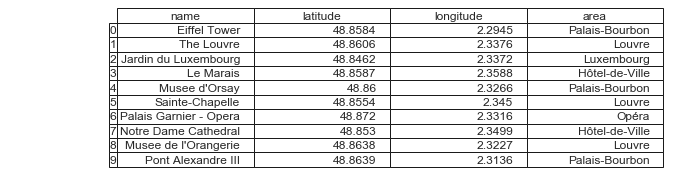

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

#from pandas.plotting.table import table
import numpy as np
from pandas.plotting import scatter_matrix
from pandas.plotting import table

fig, ax = plt.subplots(figsize=(12, 2)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, paris_top_10, loc='upper right', colWidths=[0.17]*len(paris_top_10.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.2, 1.2) # change size table
plt.savefig('table.png', transparent=True)

#Below I created a formula using the haversine calculation and applying to the coordinates of Paris Proper

In [100]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    
    '''Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)'''
    
    lat1 = float(lat1)
    lon1 = float(lon1)
    lat2 = float(lat2)
    lon2 = float(lon2)
    #miles_constant = 3959
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    #haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 3959
    mi = r * c
    return mi

In [101]:
print(haversine(48.89247049179856,2.378547117789503,48.8516,2.3574))

2.98311774765089


In [102]:
paris_top_10.reset_index()

,index,name,latitude,longitude,area
0,0,Eiffel Tower,48.8584,2.2945,Palais-Bourbon
1,1,The Louvre,48.8606,2.3376,Louvre
2,2,Jardin du Luxembourg,48.8462,2.3372,Luxembourg
3,3,Le Marais,48.8587,2.3588,Hôtel-de-Ville
4,4,Musee d'Orsay,48.8600,2.3266,Palais-Bourbon
5,5,Sainte-Chapelle,48.8554,2.3450,Louvre
6,6,Palais Garnier - Opera,48.8720,2.3316,Opéra
7,7,Notre Dame Cathedral,48.8530,2.3499,Hôtel-de-Ville
8,8,Musee de l'Orangerie,48.8638,2.3227,Louvre
9,9,Pont Alexandre III,48.8639,2.3136,Palais-Bourbon


In [103]:

#Create new data points:
#closest_attraction - set to the Attraction name with the shortest distance to the Airbnb property
#attraction_dist - set to the distance of the Attraction closest to the Airbnb property
#site_count - set to the number of attractions within 1 mile of the Airbnb property
#a new column is created for each of the top attraction, which contains the distance between the Airbnb
#property and the attraction/site

#set columns for distance to attraction
for i, bnb in listing_2019_April_OP.iterrows():
    dist_to_attraction = []
    
    site_count = 0
    
    for j, site in paris_top_10.iterrows():
        
        locitem = {}
        locitem['name'] = paris_top_10.loc[j, 'name']
        #print(site['area'], site['attraction'])
        locitem['distance'] = haversine(listing_2019_April_OP.loc[i, 'latitude'], 
                                        listing_2019_April_OP.loc[i, 'longitude'],
                                         site['latitude'],site['longitude'])
        listing_2019_April_OP.loc[i, site['name']] = locitem['distance']
        dist_to_attraction.append(locitem)
        
        if locitem['distance'] <= 1.0:
            site_count += 1
    
    dist_sorted = sorted(dist_to_attraction, key = lambda i: (i['distance'], i['name']))    
    listing_2019_April_OP.loc[i,'nearest_attraction'] = dist_sorted[0]['name']
    listing_2019_April_OP.loc[i,'attraction_dist'] = dist_sorted[0]['distance']
    
    listing_2019_April_OP.loc[i, 'site_count'] = site_count
    
    if dist_sorted[0]['distance'] < 2.0:
        listing_2019_April_OP.loc[i,'close_to_attraction'] = 1
    else:
        listing_2019_April_OP.loc[i,'close_to_attraction'] = 0

NameError: name 'listing_2019_April_OP' is not defined

In [104]:
listing_2019_April_OP.columns

NameError: name 'listing_2019_April_OP' is not defined

Index(['accommodates', 'amenities', 'availability_30', 'availability_60',
       'availability_90', 'bathrooms', 'bedrooms', 'beds',
       'cancellation_policy', 'guests_included', 'host_since',
       'host_total_listings_count', 'id', 'last_review', 'latitude',
       'longitude', 'minimum_nights', 'neighbourhood_cleansed',
       'number_of_reviews', 'price', 'property_type', 'review_scores_accuracy',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'reviews_per_month',
       'room_type', 'summary', 'transit', 'zipcode', 'arrondissement',
       'arrond_name', 'rating_ind', 'Eiffel Tower', 'The Louvre',
       'Jardin du Luxembourg', 'Le Marais', 'Musee d'Orsay', 'Sainte-Chapelle',
       'Palais Garnier - Opera', 'Notre Dame Cathedral',
       'Musee de l'Orangerie', 'Pont Alexandre III', 'closest_attraction',
       'attraction_dist', 'site_count', 'close_to_attraction'],
      dtype='object')

In [105]:
listing_2019_April_OP_OP.groupby(['neighbourhood','site_count']).id.count()

NameError: name 'listing_2019_April_OP_OP' is not defined

In [106]:
listing_2019_April_OP.head(25)

NameError: name 'listing_2019_April_OP' is not defined

In [107]:
#ExperimentCode
Price1 = listing_2019_April_OP_OP.price[listing_2019_April_OP_OP.accommodates == 2] #I create objects by accomodates
Price2 = listing_2019_April_OP_OP.price[listing_2019_April_OP_OP.accommodates == 4]
p1 = len(Price1)
p2 = len(Price2)


NameError: name 'listing_2019_April_OP_OP' is not defined

In [108]:
PricesByReviews = listing_2019_April_OP.groupby('review_scores_rating')['price'].mean().reset_index()
PricesByReviews.rename(columns={'price':'avgPrice'}, inplace=True) 
PricesByReviews.head(5)

NameError: name 'listing_2019_April_OP' is not defined

In [109]:

byNBH = listing_2019_April_OP.sort_values(by='neighbourhood')
fig = plt.figure(figsize=(18,9))
bar, ax = plt.subplots() 
ax = sns.barplot( x='neighbourhood', y='price', data=listing_2019_April_OP, color='turquoise') 
ax.set_title('Prices by Arrondissement for Properties') 
ax.set_xlabel('Paris Arrondissement') 
ax.set_ylabel('Prices') 
ax.set_xticklabels(labels=listing_2019_April_OP['neighbourhood'].unique(), rotation=90) 
plt.savefig('byNHB.png', bbox_inches='tight')

NameError: name 'listing_2019_April_OP' is not defined

In [110]:
Price_By_Type = listing_2019_April_OP.sort_values(by='property_type')

NameError: name 'listing_2019_April_OP' is not defined

NameError: name 'listing_2019_April_OP' is not defined

<Figure size 1440x1008 with 0 Axes>

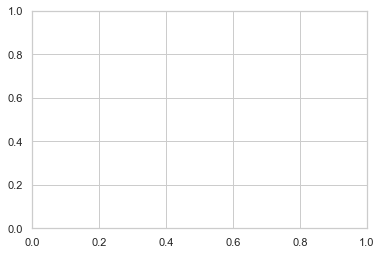

In [111]:



fig = plt.figure(figsize=(20,14))
bar, ax = plt.subplots() 
ax = sns.barplot( x='Rating_By_Range', y='price', data=listing_2019_April_OP, color=(0.4, 0.8, 0.6, 0.6)) 
ax.set_title('Price by Review Score - 0 to 100%') 
ax.set_xlabel('Review Score') 
ax.set_ylabel('Average Price') 




In [112]:
_ = plt.hist(Price1, bins=30, alpha=0.6, label='2 Guests') #Experimental Code
_ = plt.hist(Price2, bins=30, alpha=0.8, label='4 Guests')
_ = plt.xlabel('Price1')
_ = plt.ylabel('Price2')
_ = plt.legend()


NameError: name 'Price1' is not defined

In [113]:
from IPython.display import HTML
HTML("")

In [114]:
#How many listings are in each of the 19 neighborhoods; I immediately notice tht 
listing_2019_April_OP['neighbourhood'].value_counts()

NameError: name 'listing_2019_April_OP' is not defined

# Here I will review the average price per each neighborhood in Paris


In [ ]:
Price_NBH_2019_04_OP = listing_2019_April_OP.groupby('neighbourhood')['price'].mean().reset_index() #Here I write a code to aggregate each neighborhood by average price 
Price_NBH_2019_04_OP.rename(columns={'price':'avgPrice'}, inplace=True) #I rename my price column to "AVERAGE PRICE"
nbh_geo_price_2019_04_OP = pd.merge(Geo_NBH_2019, Price_NBH_2019_OP_04, on='neighbourhood')

In [ ]:
Price_NBH_2019_04_OP.head(5)

In [ ]:
nbh_price_colormap_2019_04_OP = branca.colormap.linear.YlGnBu_09.scale(min(Price_NBH_2019_OP_04['avgPrice']),
                                                                 max(Price_NBH_2019_OP_04['avgPrice']))

In [ ]:
NBH_LOC_PRICE_MAP_2019_04_OP = folium.Map(location=[48.856614, 2.3522219], zoom_start = 12, tiles='cartodbpositron')

style_function = lambda x: {
    'fillColor': nbh_price_colormap_2019_04_OP(x['properties']['avgPrice']),
    'color': 'white',
    'weight': 1,
    'fillOpacity': 0.7
}


NBH_LOC_PRICE_MAP_2019_04_OP = folium.GeoJson(
    nbh_geo_price_2019_04_OP,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['neighbourhood', 'avgPrice'],
        aliases=['Neighbourhood', 'Average price'],
        localize=True
    )
).add_to(NBH_LOC_PRICE_MAP_2019_04_OP)


nbh_price_colormap_2019_04_OP.add_to(NBH_LOC_PRICE_MAP_2019_04_OP)
nbh_price_colormap_2019_04_OP.caption = 'Paris Airbnb Neighborhood by Averge Price'
nbh_price_colormap_2019_04_OP.add_to(NBH_LOC_PRICE_MAP_2019_04_OP)


In [ ]:
NBH_LOC_PRICE_MAP_2019_04_OP

In [ ]:

# nbh_locs_price_190709_map.save('neighbourhood_locations_price_190709.html')
# nbh_locs_price_190709_map.save('20190813-neighbourhood-locations-price-190709.html')

#Now I would like to explore room price by type (There are 3 basic types of rooms listed: Private room, Shared Room, Entire House/Apartment)

In [ ]:
Price_By_Type_NBH_2019_04_OP= listing_2019_April_OP.groupby(['room_type', 'neighbourhood'])['price'].mean().reset_index()
Price_By_Type_NBH_2019_04_OP= Price_By_Type_NBH_2019_04_OP.rename(columns={'price':'avg_price'})
Price_By_Type_NBH_2019_04_OP= Price_By_Type_NBH_2019_04_OP.sort_values('avg_price', ascending=False).reset_index(drop=True)

In [ ]:
Price_By_Type_NBH_2019_04_OP.head(5)
    
# We see that a Private room in the Elysee area is more expensive than a Private room in Opera

Now I would like to further break down the neighborhoods and see the average prices per room type

In [ ]:
Private_Room_AVG_2019_04_OP = Price_By_Type_NBH_2019_04_OP[Price_By_Type_NBH_2019_04_OP['room_type']=='Private room'].reset_index(drop=True)
Entire_Hs_AVG_2019_04_OP = Price_By_Type_NBH_2019_04_OP[Price_By_Type_NBH_2019_04_OP['room_type']=='Entire home/apt'].reset_index(drop=True)
Shared_Room_2019_04_OP = Price_By_Type_NBH_2019_04_OP[Price_By_Type_NBH_2019_04_OP['room_type']=='Shared room'].reset_index(drop=True)

In [ ]:
Private_Room_AVG_2019_04_OP

#Let's review these 3 room types

In [ ]:
Room_TYPE_Accomodates = pd.pivot_table(data=listing_2019_April_OP,
                                        index='accommodates',
                                        columns='room_type',
                                        values='id',
                                        aggfunc='count',
                                        fill_value=0).reset_index()

# Below I create a function to show the experience of each host and how many listings each year of experience has

In [ ]:
def hosts_expertise_by_year(this_year, start_date):
    if type(start_date) == int:
        return '0 year'
    else:
        seniority = this_year - start_date.year
        if seniority < 2:
            return str(seniority) + ' year'
        elif 2 <= seniority < 8:
            return str(seniority) + ' years'
        else:
            return '>= 8 years'

In [ ]:

now = datetime.datetime.now()
listing_2019_April_04_OP['host_expertise'] = listing_2019_April_04_OP['host_since'].apply(lambda x: hosts_expertise_by_year(now.year, x))

In [ ]:
host_expertise_2019_04_OP_OP = listing_2019_April_OP_OP.groupby('host_expertise')['host_id'].nunique().reset_index()

host_expertise_2019_04_OP.rename(columns={'host_id':'nb'}, inplace=True)
host_expertise_2019_04_OP['QP'] = host_expertise_2019_04_OP['nb'] / host_expertise_2019_04_OP['nb'].sum()
host_expertise_2019_04_OP['labels'] = host_expertise_2019_04_OP.apply(
    lambda row: '%s\n%d locations\n(%.1f%%)' % (row['host_seniority'], row['nb'], row['QP']*100),
    axis=1)
host_expertise_2019_04_OP.sort_values('QP', ascending=False, inplace=True)

In [ ]:
plt.figure(figsize=(16, 12))

plt.rc('font', size=13)
squarify.plot(sizes=host_expertise_2019_04_OP.nb,
              label=host_expertise_2019_04_OP.labels,
              alpha=0.7)
plt.axis('off')

Insights:  

In [ ]:
from shapely.geometry import Point, shape 
import geopandas as gpd
import folium

locs_2019_04_OP_geometry = [Point(xy) for xy in zip(listing_2019_April_OP.longitude, listing_2019_April_OP.latitude)]
crs = {'init': 'epsg:4326'} # Coordinate Reference Systems, "epsg:4326" is a common projection of WGS84 Latitude/Longitude
locs_2019_04_OP_gdf = gpd.GeoDataFrame(listing_2019_April_OP, crs=crs, geometry=locs_2019_04_geometry)

In [ ]:
from folium import plugins
locs_2019_04_OP_OP_map = folium.Map(location=[48.856614, 2.3522219], zoom_start = 13, tiles='cartodbpositron')

feature_ea = folium.FeatureGroup(name='Entire home/apt')
feature_pr = folium.FeatureGroup(name='Private room')
feature_sr = folium.FeatureGroup(name='Shared room')

for i, v in locs_2019_04_OP_OP_gdf.iterrows(): #here I use HTML to create my pop-up menu
    popup = """
    Location id : <b>%s</b><br>
    Host name : <b>%s</b><br>
    Room type : <b>%s</b><br>
    Neighbourhood : <b>%s</b><br>
    Price : <b>%d</b><br>
    Minimum nights : <b>%d</b><br>
    """ % (v['id'], v['host_name'], v['room_type'], v['neighbourhood'], v['price'], v['minimum_nights'])
    
    if v['room_type'] == 'Entire home/apt':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=1,
                            tooltip=popup,
                            color='#FFBA00',
                            fill_color='#FFBA00',
                            fill=True).add_to(feature_ea)
    elif v['room_type'] == 'Private room':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=1,
                            tooltip=popup,
                            color='#087FBF',
                            fill_color='#087FBF',
                            fill=True).add_to(feature_pr)
    elif v['room_type'] == 'Shared room':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=1,
                            tooltip=popup,
                            color='#FF0700',
                            fill_color='#FF0700',
                            fill=True).add_to(feature_sr)

feature_ea.add_to(locs_2019_04_OP_map)
feature_pr.add_to(locs_2019_04_OP_map)
feature_sr.add_to(locs_2019_04_OP_map)
folium.LayerControl(collapsed=False).add_to(locs_2019_04_OP_map)

In [ ]:
locs_2019_04_OPmap

In [ ]:

locs_2019_04_OP_map_b = folium.Map(location=[48.856614, 2.3522219], zoom_start = 13, tiles='cartodbpositron')

marker_cluster = plugins.MarkerCluster().add_to(locs_2019_04_OP_map_b)

for i, v in locs_2019_04_OP_gdf.iterrows():
    popup = """
    Location id : <b>%s</b><br>
    Host name : <b>%s</b><br>
    Room type : <b>%s</b><br>
    Neighbourhood : <b>%s</b><br>
    Price : <b>%d</b><br>
    Minimum nights : <b>%d</b><br>
    """ % (v['id'], v['host_name'], v['room_type'], v['neighbourhood'], v['price'], v['minimum_nights'])
    
    if v['room_type'] == 'Entire home/apt':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=3,
                            tooltip=popup,
                            color='#FFBA00',
                            fill_color='#FFBA00',
                            fill=True).add_to(marker_cluster)
    elif v['room_type'] == 'Private room':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=3,
                            tooltip=popup,
                            color='#087FBF',
                            fill_color='#087FBF',
                            fill=True).add_to(marker_cluster)
    elif v['room_type'] == 'Shared room':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=3,
                            tooltip=popup,
                            color='#FF0700',
                            fill_color='#FF0700',
                            fill=True).add_to(marker_cluster)

I will merge both my listing data and my review data together 

# Markdown

